# INDEPENDENT T-TEST ASSUMPTIONS

[**Analysis 참고 레퍼런스**](https://pythonfordatascienceorg.wordpress.com/independent-t-test-python/)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/gwangyongkim/Documents/Python/t_test/Iris_Data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.groupby('species')['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


각 dataframe에 해당 꽃종에 대한 데이터만 포함되는 원본 데이터의 하위집합 2개의 dataframe 생성

In [4]:
setosa = df[(df['species'] == 'Iris-setosa')]
versicolor = df[(df['species'] == 'Iris-versicolor')]

## 독립 t-test 예시

- A Group(Iris-setosa)와 B Group(Iris-versicolor) 꽃종 사이에 꽃받침 폭에 유의미한 차이가 있는지 테스트

라이브러리 가져오기

In [5]:
from scipy import stats
import matplotlib.pyplot as plt

### 1. t-test를 수행하기 전 가정을 검정해야함

먼저, 분산의 동질성을 테스트하기 위해 Levene의 분산 동질성 테스트를 사용
- stats.levene()

In [6]:
stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.4172859681296204)

p-value가 0.05 보다 크기 때문에 "각 그룹의 모집단에서의 분산이 동일하다"는 귀무가설을 기각하지 못함.
- 따라서, 주어진 데이터에서는 등분산성을 가정할 수 있음
- 각 그룹의 모집단에서의 분산이 크게 다르지 않다는 것을 의미
- t-test를 신뢰할 수 있는 분산의 동질성을 보여주는 것으로 해석

결론적으로 테스트 결과가 유의하지 않기 때문에 분산의 동질성이 있고, t-test를 계속 진행할 수 있음

### 2. 정규성 가정 테스트

- A Group : setosa

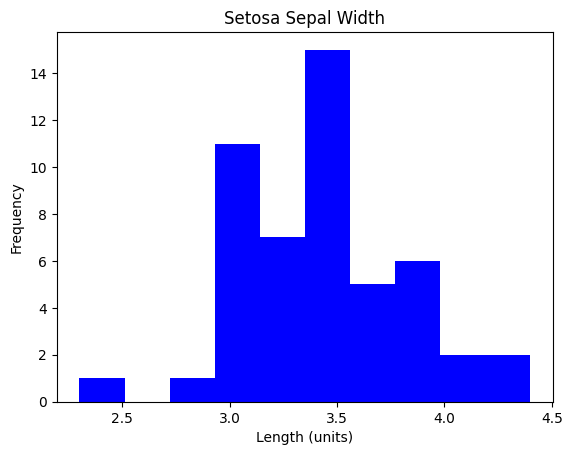

In [7]:
setosa['sepal_width'].plot(kind="hist", title="Setosa Sepal Width", color='blue')
plt.xlabel("Length (units)")
plt.savefig('Setosa_sepal_width')

- B Group : versicolor

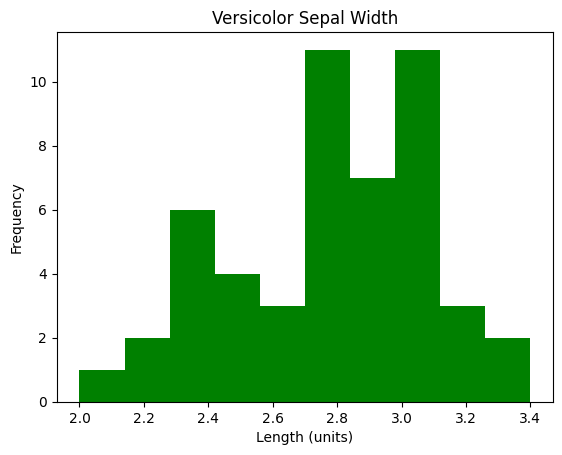

In [8]:
versicolor['sepal_width'].plot(kind="hist", title= "Versicolor Sepal Width", color="green")
plt.xlabel("Length (units)")
plt.savefig('Versicolor_sepal_width')

- A/B 두 그룹의 히스토그램을 보면 각 변수가 상당히 정규분포 되어 있는 것처럼 보임
- 데이터를 q-q plot으로 시각화하면 정규성을 더 쉽게 파악할 수 있음
- q-q plot을 읽는데 익숙하지 않은 경우, 빨간색 선을 기준으로 멀리 떨어져 있는 데이터 포인트가 있다면 정상에서 벗어난 편차가 있다는 뜻

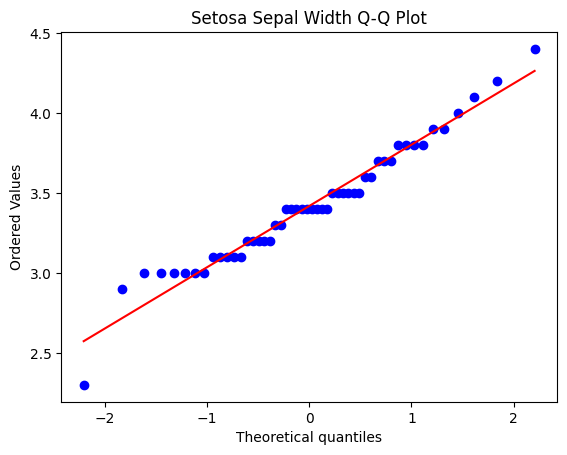

In [9]:
stats.probplot(setosa['sepal_width'], dist="norm", plot= plt)
plt.title("Setosa Sepal Width Q-Q Plot")
plt.savefig("Setosa_qqplot.png")

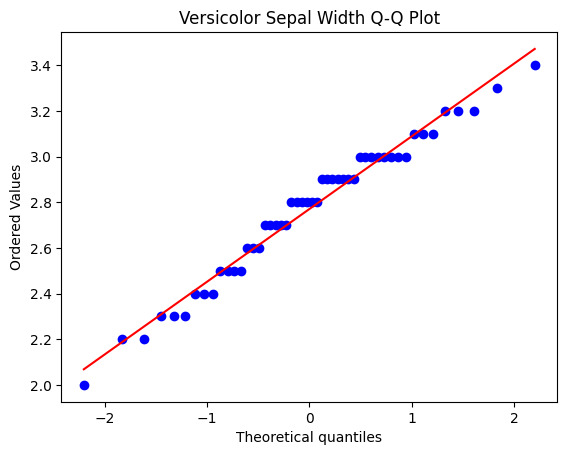

In [10]:
stats.probplot(versicolor['sepal_width'], dist="norm", plot= plt)
plt.title("Versicolor Sepal Width Q-Q Plot")
plt.savefig("versicolor_qqplot.png")

- A Group(setosa) q-q plot에서 정규성에서 약간의 편차가 있지만 큰 위반은 아닌 것으로 해석됨
- 전체적으로 데이터는 정규성을 가지고 있는 것으로 해석
- 이를 확인하기 위해 stats.shapro() 메서드인 Shapiro-Wilk 정규성 테스트를 사용하여 통계적으로 테스트 할 수 있음
- 첫 번째 값은 W 테스트 통계이고, 두 번째 값은 p-value

Shapiro Walk 검정 관련 참고 글 : https://statisticsplaybook.com/normality-test/

In [11]:
stats.shapiro(setosa['sepal_width'])

ShapiroResult(statistic=0.9686915278434753, pvalue=0.20464898645877838)

In [12]:
stats.shapiro(versicolor['sepal_width'])

ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)

정규성 테스트 중 어느것도 정규성 가정을 위반하지 않음
- W값이 1에 가깝고, p-vlaue가 0.05 보다 크기 때문에 귀무가설을 기각하지 못함.

- 정규성 가정 : 귀무가설(데이터가 정규분포를 따른다) vs. 대립가설(데이터가 정규분포를 따르지 않는다)
- W값은 0~1 사이의 값을 가지고, 귀무가설이 참이면 이론적으로 1이 나오도록 설계됨
- W값이 0과 가까우면 가까울수록 정규분포와는 다르게 분포되어있다고 봄
- 독립 t-test를 수행하려면 stats.ttest_ind() 메서드를 사용

In [13]:
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

독립 t-test결과가 유의미한 것으로 해석됨
- p-value가 0에 가깝기 때문에 귀무가설을 기각할 수 있음

## 결과 해석

"A Group(Iris-setosa)와 B Group(Iris-versicolor) 꽃종 사이에 꽃받침 폭에 유의미한 차이가 있는지 테스트"

- A Group의 평균 꽃받침 폭(M=3.418, SD=0.381)은 B Group(M=2.770, SD=0.314)보다 더 넓고 편차가 큰 것으로 보임
- 분산 동질성에 대한 Levene의 검정 결과 분산 동등성(F=0.664, pvalue=0.417)이 나타났으므로 독립 t-test가 신뢰할만함

A Group(Iris-setosa)와 B Group(Iris-versicolor) 꽃종 사이에 꽃받침 폭에 유의미한 차이가 있는것으로 나타남
- 두 그룹의 df(degrees of vreedom) = 두 그룹 N을 합하고, 2를 빼서 계산 (df = (50+50) - 2 = 98)
- t(98)=9.282, pvalue=4.362239016010214e-15